In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

def analizar_precision_predicciones(archivo_excel, hoja='Sheet1'):
    """
    Analiza la precisión de predicciones vs valores reales
    
    Parámetros:
    archivo_excel (str): Ruta del archivo Excel
    hoja (str): Nombre de la hoja a analizar
    
    Returns:
    dict: Diccionario con todos los resultados del análisis
    """
    
    # Leer los datos
    df = pd.read_excel(archivo_excel, sheet_name=hoja)
    
    # Calcular el porcentaje (0.5/Real*100%)
    df['Porcentaje'] = (df['0.5'] / df['Real']) * 100
    
    # Clasificar según los rangos
    def clasificar_precision(porcentaje):
        if 95 <= porcentaje <= 105:
            return 'EXCELENTE'
        elif 90 <= porcentaje <= 110:
            return 'BUENO'
        elif 80 <= porcentaje <= 120:
            return 'ACEPTABLE'
        else:
            return 'NECESITA MEJORA'
    
    df['Categoria'] = df['Porcentaje'].apply(clasificar_precision)
    
    # Calcular errores
    df['Error'] = df['0.5'] - df['Real']
    df['Error_Absoluto'] = df['Error'].abs()
    df['Error_Porcentual'] = (df['Error_Absoluto'] / df['Real']) * 100
    
    # Conteo por categorías
    conteo = df['Categoria'].value_counts()
    total_registros = len(df)
    
    # Calcular porcentajes
    distribucion = {}
    for categoria in ['EXCELENTE', 'BUENO', 'ACEPTABLE', 'NECESITA MEJORA']:
        cantidad = conteo.get(categoria, 0)
        porcentaje = (cantidad / total_registros) * 100
        distribucion[categoria] = {
            'cantidad': cantidad,
            'porcentaje': porcentaje
        }
    
    # Calcular métricas de error
    rmse = np.sqrt(mean_squared_error(df['Real'], df['0.5']))
    mae = mean_absolute_error(df['Real'], df['0.5'])
    mape = df['Error_Porcentual'].mean()
    
    # Estadísticas adicionales
    estadisticas = {
        'porcentaje_min': df['Porcentaje'].min(),
        'porcentaje_max': df['Porcentaje'].max(),
        'porcentaje_promedio': df['Porcentaje'].mean(),
        'porcentaje_mediana': df['Porcentaje'].median(),
        'porcentaje_std': df['Porcentaje'].std()
    }
    
    # Crear el resultado completo
    resultado = {
        'dataframe': df,
        'total_registros': total_registros,
        'distribucion': distribucion,
        'metricas': {
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        },
        'estadisticas': estadisticas
    }
    
    return resultado

In [17]:
############ COMPARACIÓN DE RESULTADOS, PREDICCIÓN 6 ÚLTIMOS MESES, MODELO ENTRENADO CON TODA LA DATA ############

In [28]:
resultado = analizar_precision_predicciones('resultados_DeepAR_15.xlsx', hoja='Sheet1')

In [19]:
def crear_reporte_visual(resultado, guardar_graficos=True):
    """
    Crea visualizaciones del análisis
    
    Parámetros:
    resultado (dict): Resultado del análisis
    guardar_graficos (bool): Si guardar los gráficos como archivos
    """
    
    # Configurar el estilo
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis de Precisión de Predicciones', fontsize=16, fontweight='bold')
    
    # Gráfico 1: Distribución por categorías (Pie Chart)
    categorias = list(resultado['distribucion'].keys())
    cantidades = [resultado['distribucion'][cat]['cantidad'] for cat in categorias]
    colores = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c']  # Verde, amarillo, naranja, rojo
    
    axes[0,0].pie(cantidades, labels=categorias, autopct='%1.1f%%', colors=colores, startangle=90)
    axes[0,0].set_title('Distribución por Categorías de Precisión')
    
    # Gráfico 2: Histograma de porcentajes
    df = resultado['dataframe']
    axes[0,1].hist(df['Porcentaje'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].axvline(x=100, color='red', linestyle='--', label='Predicción perfecta (100%)')
    axes[0,1].axvline(x=95, color='green', linestyle='--', alpha=0.7, label='Rango excelente')
    axes[0,1].axvline(x=105, color='green', linestyle='--', alpha=0.7)
    axes[0,1].set_xlabel('Porcentaje (Predicción/Real × 100%)')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución de Porcentajes de Precisión')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Scatter plot Predicción vs Real
    axes[1,0].scatter(df['Real'], df['0.5'], alpha=0.6, color='blue')
    # Línea de predicción perfecta
    min_val = min(df['Real'].min(), df['0.5'].min())
    max_val = max(df['Real'].max(), df['0.5'].max())
    axes[1,0].plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción perfecta')
    axes[1,0].set_xlabel('Valores Reales')
    axes[1,0].set_ylabel('Predicciones (0.5)')
    axes[1,0].set_title('Predicciones vs Valores Reales')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Boxplot de errores por categoría
    sns.boxplot(data=df, x='Categoria', y='Error_Absoluto', ax=axes[1,1])
    axes[1,1].set_title('Distribución de Errores Absolutos por Categoría')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    plt.show()

95 <= porcentaje <= 105: EXCELENTE
90 <= porcentaje <= 110: BUENO
80 <= porcentaje <= 120: ACEPTABLE
Resultado modelo DeepAR


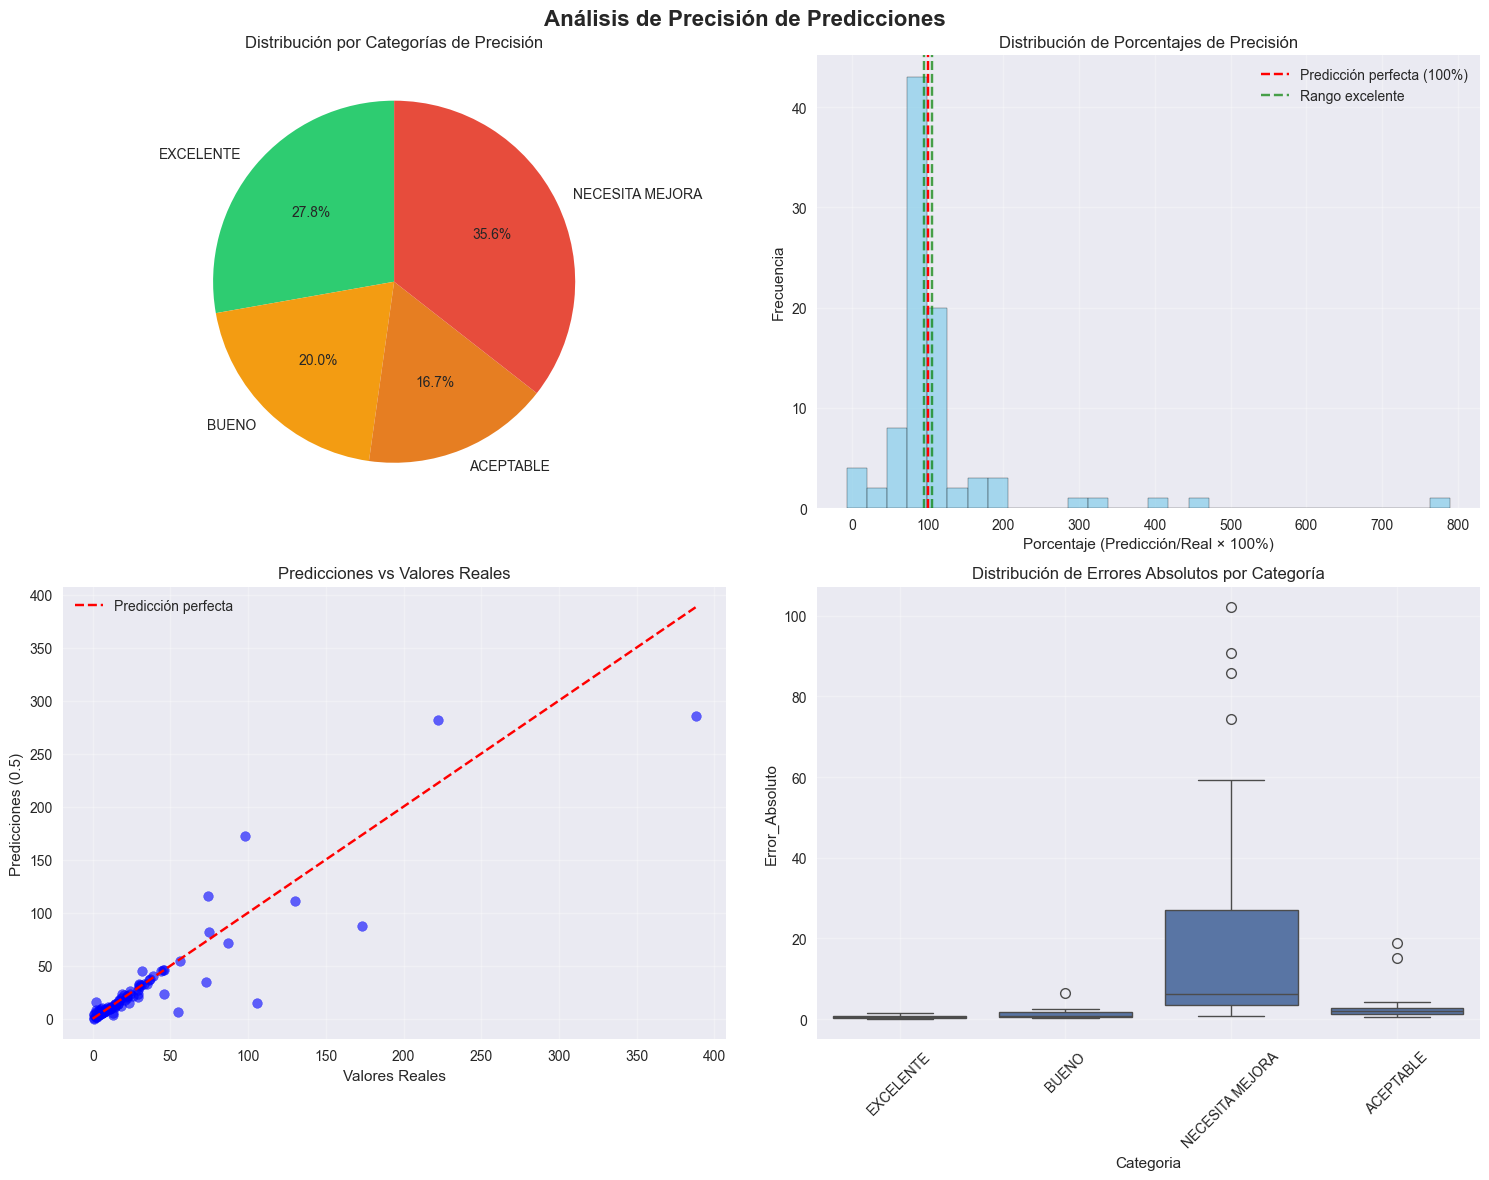

In [20]:
print('95 <= porcentaje <= 105: EXCELENTE') 
print('90 <= porcentaje <= 110: BUENO') 
print('80 <= porcentaje <= 120: ACEPTABLE') 
print('Resultado modelo DeepAR')
crear_reporte_visual(resultado)

In [21]:
resultado_2 = analizar_precision_predicciones('resultados_Prophet_15.xlsx', hoja='in')

Resultado modelo Prophet


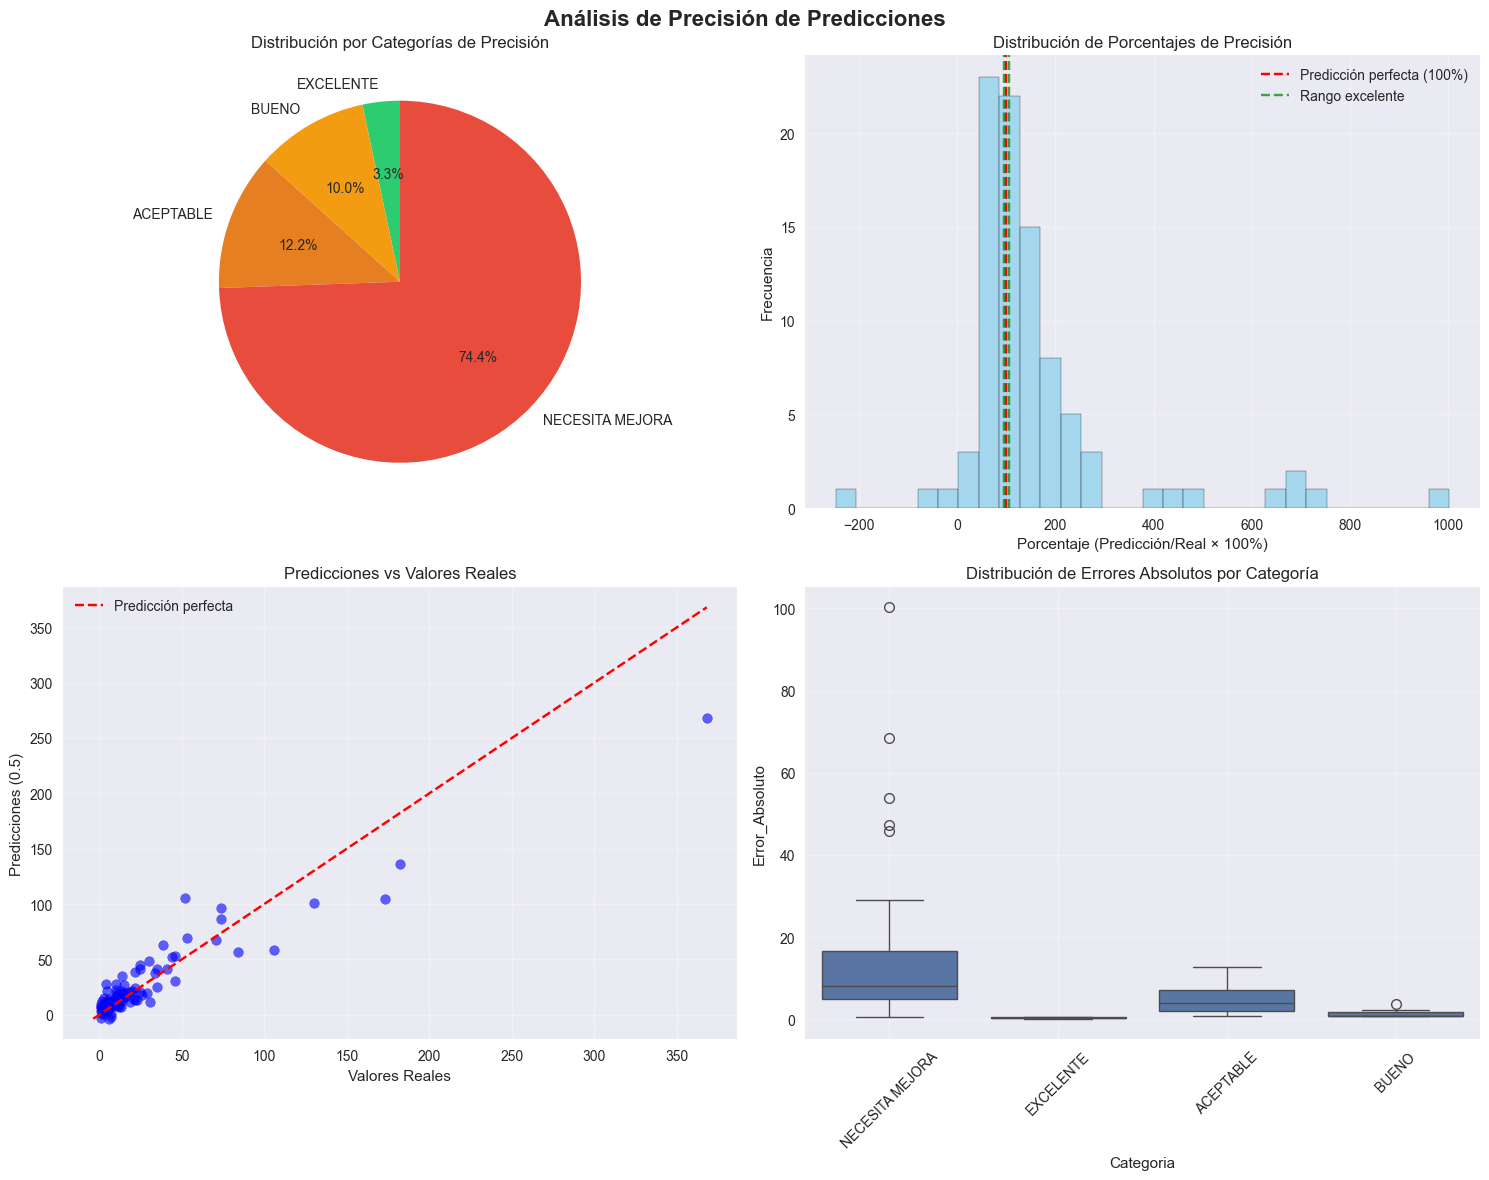

In [22]:
print('Resultado modelo Prophet')
crear_reporte_visual(resultado_2)

In [23]:
############ COMPARACIÓN DE RESULTADOS, ENTRANAMIENTO DATA-6MESES, TESTEO 6 MESES ############

In [24]:
resultado = analizar_precision_predicciones('resultados_DeepAR_27_RMSE.xlsx', hoja='Sheet1')

In [25]:
print('Métricas DeepAR 27 productos con 6 meses de testing')
resultado['metricas']

Métricas DeepAR 27 productos con 6 meses de testing


{'RMSE': 51.43030962591935,
 'MAE': 26.346820054412962,
 'MAPE': 179.72815758201594}

In [26]:
resultado = analizar_precision_predicciones('resultados_Prophet_27_RMSE.xlsx', hoja='in')

In [27]:
print('Métricas Prophet 27 productos con 6 meses de testing')
resultado['metricas']

Métricas Prophet 27 productos con 6 meses de testing


{'RMSE': 176.89108018624384,
 'MAE': 59.59196349600039,
 'MAPE': 1672.7402603632004}